# Phase 3 project
### Author: Keith Maina

## Overview
In this project we are going to be creating a machine learning model that determines whether a user of the SyriaTelcom service churns out of the service or not.

# Business Understanding
### <u>Stakeholder</u>
This project is for the SyriaTel telecom business.
### <u>Business Problem</u>
Clilents who stop using a service are not good for any business, because that leads to losses. We need to find out the clients that are likely to churn prior to when they do actually churn, so that we could target client retention efforts toward them.

## Data Understanding

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score
from sklearn.preprocessing import StandardScaler

In [3]:
data= pd.read_csv('data/bigml.csv')

In [4]:
data

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,414-4276,no,yes,36,156.2,77,26.55,...,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,370-3271,no,no,0,231.1,57,39.29,...,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,328-8230,no,no,0,180.8,109,30.74,...,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,364-6381,yes,no,0,213.8,105,36.35,...,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

### Column descriptions
state - the US state in which the customer resides, indicated by a two-letter abbreviation<br><br>
account length - the number of days that this account has been active<br><br>
area code - the three-digit area code of the corresponding customer’s phone number<br><br>
phone number -the remaining seven-digit phone number<br><br>
international plan - whether the client has an international calling plan or not<br><br>
voicemail plan - whether the client has a voicemail plan or not<br><br>
number vmail messages - number of voice mails the client gets per month<br><br>
total day minutes - amount of time(in minutes) spent on calls during the day<br><br>
total day calls - number of calls the client makes during the day<br><br>
total day charge - amount of money client pays for calls made during the day<br><br>
total eve minutes - - amount of time(in minutes) spent on calls in the evening<br><br>
total eve calls - number of calls the client makes in the evening<br><br>
total eve charge - amount of money client pays for calls made in the evening<br><br>
total night minutes - amount of time(in minutes) spent on calls during the night<br><br>
total night calls - number of calls the client makes during the night<br><br>
total night charge - amount of money client pays for calls made during the night<br><br>
total intl minutes - amount of time(in minutes) spent on international calls<br><br>
total intl calls - number of international calls the client makes<br><br>
total intl charge - amount of money client pays for international calls<br><br>
customer service calls - number of times the client has called customer service<br><br>
churn - whether the client left the service

In [6]:
data['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

The dataset is quite imbalanced. A model predicting only False would have 85.5% accuracy.

In [7]:
2850/ (2850+483)

0.8550855085508551

The dataset is quite imbalanced. A model predicting only False would have 85.5% accuracy.

## Data Preparation

In [8]:
data['churn']= data['churn'].map(lambda x: 1 if x else 0)

In [9]:
data['churn'].value_counts()

0    2850
1     483
Name: churn, dtype: int64

We drop the phone number column since it doesn't make sense that it would be determining facotr of churning.

In [10]:
data= data.drop('phone number', axis= 1)

In [11]:
data_logistic= pd.get_dummies(data, dtype= 'float')

In [12]:
data_logistic.columns

Index(['account length', 'area code', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn', 'state_AK', 'state_AL', 'state_AR',
       'state_AZ', 'state_CA', 'state_CO', 'state_CT', 'state_DC', 'state_DE',
       'state_FL', 'state_GA', 'state_HI', 'state_IA', 'state_ID', 'state_IL',
       'state_IN', 'state_KS', 'state_KY', 'state_LA', 'state_MA', 'state_MD',
       'state_ME', 'state_MI', 'state_MN', 'state_MO', 'state_MS', 'state_MT',
       'state_NC', 'state_ND', 'state_NE', 'state_NH', 'state_NJ', 'state_NM',
       'state_NV', 'state_NY', 'state_OH', 'state_OK', 'state_OR', 'state_PA',
       'state_RI', 'state_SC', 'state_SD', 'state_TN', 'state_TX', 'state_UT',
       'state_VA', 'state_VT'

## Modeling

### Logistic Regression

In [13]:
# split the data into target variable and determinant variables
y= data_logistic['churn']
X= data_logistic.drop('churn', axis= 1)

In [14]:
# split the data into training and testsets
# we specify a random state so that results are reproducable
X_train, X_test, y_train, y_test= train_test_split(X, y, random_state=42, stratify=y)

In [15]:
# instantiate the model
base= LogisticRegression(random_state=42, solver= 'liblinear')
base.fit(X_train, y_train);

Base model evaluation

In [16]:
print(f1_score(y_train, base.predict(X_train)))
print(f1_score(y_test, base.predict(X_test)))

0.37692307692307686
0.3274853801169591


In [17]:
y_score = base.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7922872741182062


#### Regularized model

In [18]:
# model with regularization
base_reg= LogisticRegression(random_state=42, C=1e12, solver= 'liblinear', fit_intercept=False)
base_reg.fit(X_train, y_train);

In [19]:
print(f1_score(y_train, base_reg.predict(X_train)))
print(f1_score(y_test, base_reg.predict(X_test)))

0.4074766355140187
0.3646408839779005


In [20]:
y_score = base_reg.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7909774784695097


#### A model that accounts for class imbalance

In [21]:
log3= LogisticRegression(random_state=42, C=1e12, solver= 'liblinear', fit_intercept=False, class_weight= 'balanced')
log3.fit(X_train, y_train);

In [22]:
print(f1_score(y_train, log3.predict(X_train)))
print(f1_score(y_test, log3.predict(X_test)))

0.5009009009009009
0.44919786096256686


In [23]:
y_score = log3.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7916613540736963


#### We add ridge penalties

In [24]:
log4= LogisticRegression(random_state=42, C=1e12, solver= 'liblinear', fit_intercept=False, class_weight= 'balanced',
                        penalty='l2')
log4.fit(X_train, y_train);

In [25]:
print(f1_score(y_train, log4.predict(X_train)))
print(f1_score(y_test, log4.predict(X_test)))

0.5009009009009009
0.44919786096256686


In [26]:
y_score = log4.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7916613540736963


### K-Nearest Neighbors

Normalizing the data

In [27]:
scaler = StandardScaler()

scaler.fit_transform(X_train)
Xtrain_scaled= scaler.transform(X_train)
Xtest_scaled= scaler.transform(X_test)

In [28]:
kn_baseModel= KNeighborsClassifier()
kn_baseModel.fit(Xtrain_scaled, y_train)

KNeighborsClassifier()

In [29]:
print(f1_score(y_train, kn_baseModel.predict(Xtrain_scaled)))
print(f1_score(y_test, kn_baseModel.predict(Xtest_scaled)))

0.3325942350332594
0.12857142857142856


In [30]:
different_metric= KNeighborsClassifier(metric= 'chebyshev')
different_metric.fit(Xtrain_scaled, y_train)

KNeighborsClassifier(metric='chebyshev')

In [31]:
print(f1_score(y_train, different_metric.predict(Xtrain_scaled)))
print(f1_score(y_test, different_metric.predict(Xtest_scaled)))

0.35497835497835495
0.16993464052287582


We loop through values of k to find the value that has the best f1_score

In [32]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k, metric= 'chebyshev')
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("Best Value for k: {}".format(best_k))
    print("F1-Score: {}".format(best_score))

In [33]:
find_best_k(Xtrain_scaled, y_train, Xtest_scaled, y_test)

Best Value for k: 1
F1-Score: 0.3035714285714286


The KNN model cannot be trusted since the best value of k is 1, which would mean it only looks at 1 of the neighbors next to it.

### Decision Tree

In [34]:
tree= DecisionTreeClassifier (criterion='entropy')
tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [35]:
print(f1_score(y_train, tree.predict(Xtrain_scaled)))
print(f1_score(y_test, tree.predict(Xtest_scaled)))

0.3328149300155521
0.36444444444444446


Add a max_depth to the tree

In [36]:
tree2= DecisionTreeClassifier (criterion='entropy', max_depth= 7)
tree2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [37]:
print(f1_score(y_train, tree2.predict(Xtrain_scaled)))
print(f1_score(y_test, tree2.predict(Xtest_scaled)))

0.2530583711988815
0.2534031413612565


## Modeling Results

We take log4 as the final model as it has both the highest f1_scores and the most area under the curve

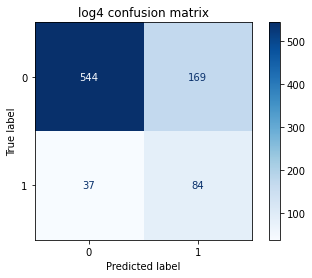

In [48]:
plot_confusion_matrix(log4, X_test, y_test, cmap=plt.cm.Blues)
plt.title('log4 confusion matrix')
plt.show()